In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
import seaborn as sns

# Data Exploration and Preprocessing:

In [3]:
df=pd.read_csv("adult_with_headers.csv")

In [4]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
df.duplicated().sum()

24

In [9]:
df.drop_duplicates(keep='first',inplace=True)

In [10]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
num_col=[i for i in df.columns if df[i].dtype!='O']

In [12]:
df[num_col]

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [13]:
std_sca=StandardScaler()

In [14]:
df[num_col]=std_sca.fit_transform(df[num_col])

In [15]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030390,State-gov,-1.063569,Bachelors,1.134777,Never-married,Adm-clerical,Not-in-family,White,Male,0.148292,-0.216743,-0.035664,United-States,<=50K
1,0.836973,Self-emp-not-inc,-1.008668,Bachelors,1.134777,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145975,-0.216743,-2.222483,United-States,<=50K
2,-0.042936,Private,0.245040,HS-grad,-0.420679,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145975,-0.216743,-0.035664,United-States,<=50K
3,1.056950,Private,0.425752,11th,-1.198407,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145975,-0.216743,-0.035664,United-States,<=50K
4,-0.776193,Private,1.408066,Bachelors,1.134777,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145975,-0.216743,-0.035664,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849519,Private,0.639678,Assoc-acdm,0.745913,Married-civ-spouse,Tech-support,Wife,White,Female,-0.145975,-0.216743,-0.197650,United-States,<=50K
32557,0.103716,Private,-0.335436,HS-grad,-0.420679,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.145975,-0.216743,-0.035664,United-States,>50K
32558,1.423579,Private,-0.358779,HS-grad,-0.420679,Widowed,Adm-clerical,Unmarried,White,Female,-0.145975,-0.216743,-0.035664,United-States,<=50K
32559,-1.216148,Private,0.110930,HS-grad,-0.420679,Never-married,Adm-clerical,Own-child,White,Male,-0.145975,-0.216743,-1.655530,United-States,<=50K


In [16]:
## MINMAXSCALER

In [17]:
min=MinMaxScaler()

In [18]:
df[num_col]=min.fit_transform(df[num_col])

In [19]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,<=50K
32557,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
32558,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,<=50K
32559,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,<=50K


In [20]:
# Standard Scaling is preferred when the data follows a Gaussian distribution,
# as it standardizes features to have a mean of 0 and a standard deviation of 1.

In [21]:
# Min-Max Scaling is useful when features have different ranges, scaling them to a fixed range (usually [0, 1]), which is
# beneficial for algorithms that rely on distance calculations.

# Encoding Techniques:

In [23]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,<=50K
32557,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
32558,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,<=50K
32559,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,<=50K


In [24]:
cat_col=[i for i in df.columns if df[i].dtypes=='O']
print(df[cat_col].value_counts())

workclass    education     marital_status         occupation         relationship  race   sex     native_country  income
Private      HS-grad       Married-civ-spouse     Craft-repair       Husband       White  Male    United-States   <=50K     546
             Bachelors     Married-civ-spouse     Exec-managerial    Husband       White  Male    United-States   >50K      369
             HS-grad       Married-civ-spouse     Machine-op-inspct  Husband       White  Male    United-States   <=50K     268
                                                  Craft-repair       Husband       White  Male    United-States   >50K      255
             Bachelors     Married-civ-spouse     Prof-specialty     Husband       White  Male    United-States   >50K      223
                                                                                                                           ... 
             Assoc-acdm    Married-civ-spouse     Sales              Wife          White  Female  United-States

In [26]:
cols_to_encode=[]
for col in cat_col:
    unique_count = df[col].nunique()
    if unique_count < 5:
        cols_to_encode.append(col)

In [27]:
cols_to_encode

['sex', 'income']

In [28]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,<=50K
32557,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
32558,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,<=50K
32559,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,<=50K


In [29]:
df=pd.get_dummies(df,columns=['sex','income'],dtype='int',drop_first=True)

In [30]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,0.021740,0.0,0.397959,United-States,1,0
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,0.000000,0.0,0.122449,United-States,1,0
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,0.000000,0.0,0.397959,United-States,1,0
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.000000,0.0,0.397959,United-States,1,0
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,0.000000,0.0,0.397959,Cuba,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,0.000000,0.0,0.377551,United-States,0,0
32557,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,0.000000,0.0,0.397959,United-States,1,1
32558,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,0.000000,0.0,0.397959,United-States,0,0
32559,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,0.000000,0.0,0.193878,United-States,1,0


In [31]:
cat_col=[i for i in df.columns if df[i].dtype=='O']

In [32]:
cols_to_encode1=[]
for col in cat_col:
    unique_count = df[col].nunique()
    if unique_count >= 5:
        cols_to_encode1.append(col)
cols_to_encode1

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'native_country']

In [34]:
la=LabelEncoder()
for column in df[cols_to_encode1]:
    df[column] = la.fit_transform(df[column])

In [35]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K
0,0.301370,7,0.044302,9,0.800000,4,1,1,4,0.021740,0.0,0.397959,39,1,0
1,0.452055,6,0.048238,9,0.800000,2,4,0,4,0.000000,0.0,0.122449,39,1,0
2,0.287671,4,0.138113,11,0.533333,0,6,1,4,0.000000,0.0,0.397959,39,1,0
3,0.493151,4,0.151068,1,0.400000,2,6,0,2,0.000000,0.0,0.397959,39,1,0
4,0.150685,4,0.221488,9,0.800000,2,10,5,2,0.000000,0.0,0.397959,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,4,0.166404,7,0.733333,2,13,5,4,0.000000,0.0,0.377551,39,0,0
32557,0.315068,4,0.096500,11,0.533333,2,7,0,4,0.000000,0.0,0.397959,39,1,1
32558,0.561644,4,0.094827,11,0.533333,6,1,4,4,0.000000,0.0,0.397959,39,0,0
32559,0.068493,4,0.128499,11,0.533333,4,1,3,4,0.000000,0.0,0.193878,39,1,0


In [36]:
## One-Hot Encoding creates new binary columns for each category, which can lead to a sparse matrix and may increase dimensionality. It is useful for nominal categorical variables.

In [37]:
## Label Encoding assigns a unique integer to each category, which is efficient but can introduce unintended ordinal relationships in nominal data

## Feature Engineering:

In [39]:
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])
df['work_hours_category'] = df['hours_per_week'].apply(lambda x: 'High' if x > 40 else 'Low')

In [40]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,age_group,work_hours_category
0,0.301370,7,0.044302,9,0.800000,4,1,1,4,0.021740,0.0,0.397959,39,1,0,Young,Low
1,0.452055,6,0.048238,9,0.800000,2,4,0,4,0.000000,0.0,0.122449,39,1,0,Young,Low
2,0.287671,4,0.138113,11,0.533333,0,6,1,4,0.000000,0.0,0.397959,39,1,0,Young,Low
3,0.493151,4,0.151068,1,0.400000,2,6,0,2,0.000000,0.0,0.397959,39,1,0,Young,Low
4,0.150685,4,0.221488,9,0.800000,2,10,5,2,0.000000,0.0,0.397959,5,0,0,Young,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,4,0.166404,7,0.733333,2,13,5,4,0.000000,0.0,0.377551,39,0,0,Young,Low
32557,0.315068,4,0.096500,11,0.533333,2,7,0,4,0.000000,0.0,0.397959,39,1,1,Young,Low
32558,0.561644,4,0.094827,11,0.533333,6,1,4,4,0.000000,0.0,0.397959,39,0,0,Young,Low
32559,0.068493,4,0.128499,11,0.533333,4,1,3,4,0.000000,0.0,0.193878,39,1,0,Young,Low


In [41]:
## Age groups can capture different income patterns and behaviors.

In [42]:
## Categorizing work hours can help differentiate between high and low earners based on their working hours.

In [43]:
df['log_age'] = np.log(df['age'] + 1)  

In [45]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,age_group,work_hours_category,log_age
0,0.301370,7,0.044302,9,0.800000,4,1,1,4,0.021740,0.0,0.397959,39,1,0,Young,Low,0.263417
1,0.452055,6,0.048238,9,0.800000,2,4,0,4,0.000000,0.0,0.122449,39,1,0,Young,Low,0.372980
2,0.287671,4,0.138113,11,0.533333,0,6,1,4,0.000000,0.0,0.397959,39,1,0,Young,Low,0.252835
3,0.493151,4,0.151068,1,0.400000,2,6,0,2,0.000000,0.0,0.397959,39,1,0,Young,Low,0.400888
4,0.150685,4,0.221488,9,0.800000,2,10,5,2,0.000000,0.0,0.397959,5,0,0,Young,Low,0.140357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,4,0.166404,7,0.733333,2,13,5,4,0.000000,0.0,0.377551,39,0,0,Young,Low,0.128381
32557,0.315068,4,0.096500,11,0.533333,2,7,0,4,0.000000,0.0,0.397959,39,1,1,Young,Low,0.273889
32558,0.561644,4,0.094827,11,0.533333,6,1,4,4,0.000000,0.0,0.397959,39,0,0,Young,Low,0.445739
32559,0.068493,4,0.128499,11,0.533333,4,1,3,4,0.000000,0.0,0.193878,39,1,0,Young,Low,0.066249


## Feature Selection:

In [57]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.05)  
outliers = iso_forest.fit_predict(df[num_col])
df = df[outliers != -1]

In [69]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,sex_ Male,income_ >50K,age_group,work_hours_category,log_age
0,0.301370,7,0.044302,9,0.800000,4,1,1,4,0.021740,0.0,0.397959,39,1,0,Young,Low,0.263417
1,0.452055,6,0.048238,9,0.800000,2,4,0,4,0.000000,0.0,0.122449,39,1,0,Young,Low,0.372980
2,0.287671,4,0.138113,11,0.533333,0,6,1,4,0.000000,0.0,0.397959,39,1,0,Young,Low,0.252835
3,0.493151,4,0.151068,1,0.400000,2,6,0,2,0.000000,0.0,0.397959,39,1,0,Young,Low,0.400888
4,0.150685,4,0.221488,9,0.800000,2,10,5,2,0.000000,0.0,0.397959,5,0,0,Young,Low,0.140357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,4,0.166404,7,0.733333,2,13,5,4,0.000000,0.0,0.377551,39,0,0,Young,Low,0.128381
32557,0.315068,4,0.096500,11,0.533333,2,7,0,4,0.000000,0.0,0.397959,39,1,1,Young,Low,0.273889
32558,0.561644,4,0.094827,11,0.533333,6,1,4,4,0.000000,0.0,0.397959,39,0,0,Young,Low,0.445739
32559,0.068493,4,0.128499,11,0.533333,4,1,3,4,0.000000,0.0,0.193878,39,1,0,Young,Low,0.066249


In [70]:
df.drop(columns=['age_group','work_hours_category'],inplace=True)

C:\Users\SATEESH REDDY\AppData\Local\Temp\ipykernel_10724\1781698618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['age_group','work_hours_category'],inplace=True)


In [92]:
df=df.corr()

<Axes: >

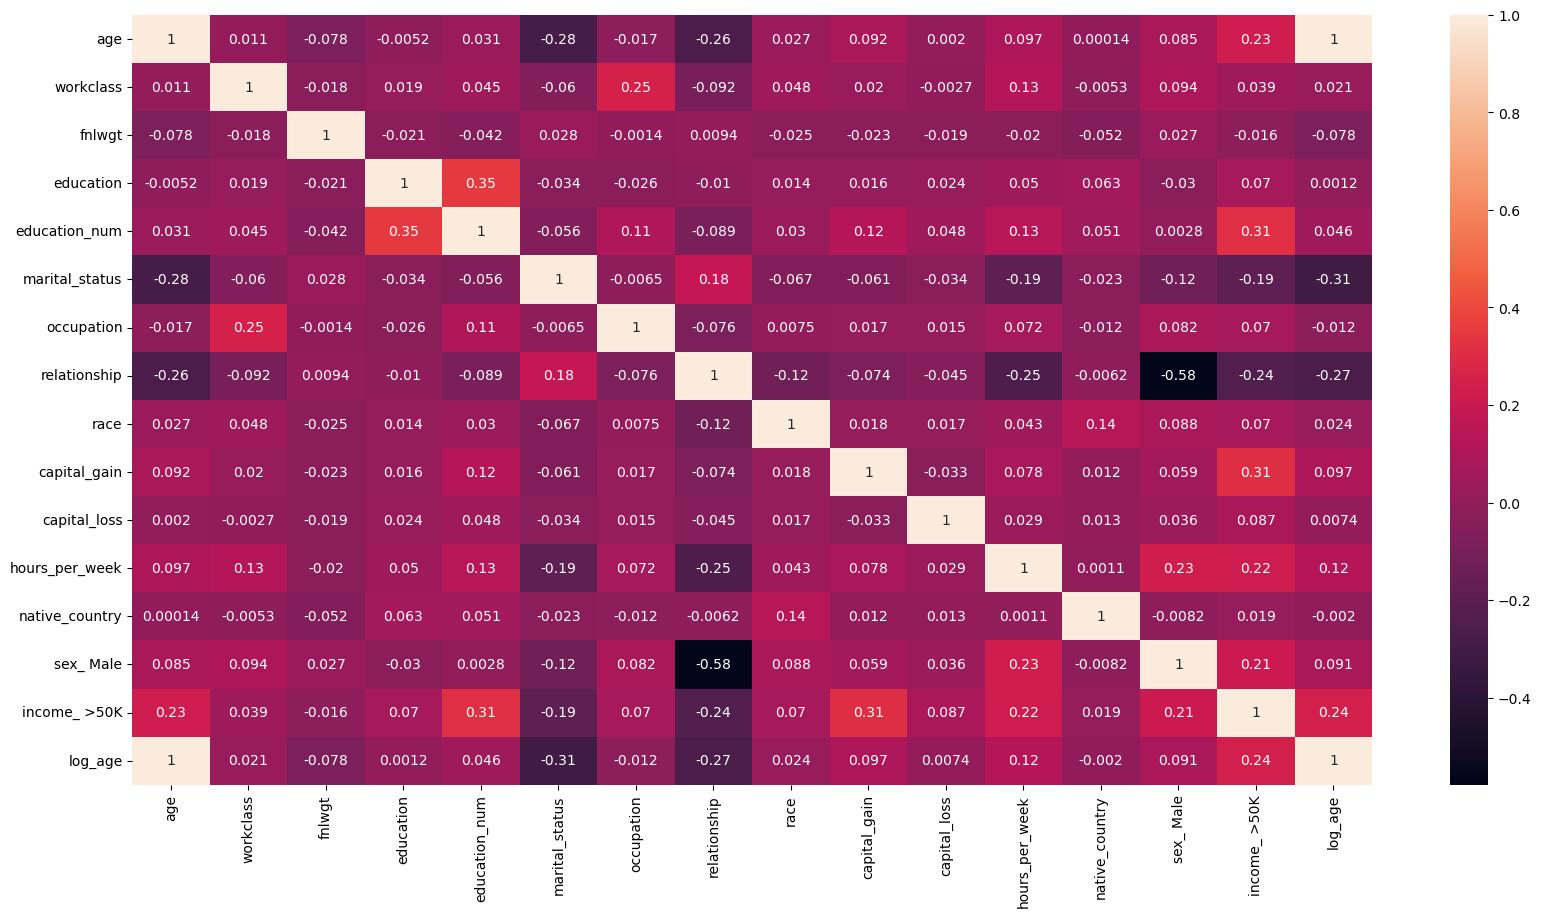

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(data=df,annot=True)